In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train= pd.read_csv("train_E1GspfA.csv")

In [3]:
test=pd.read_csv("test_6QvDdzb.csv")

In [4]:
ran=pd.read_csv("sample_4E0BhPN.csv")

In [5]:
train.shape,test.shape,ran.shape

((18247, 3), (7650, 2), (7650, 3))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.7+ KB


In [8]:
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d',errors='coerce')

train['date'].max(),train['date'].min()

(Timestamp('2021-02-28 00:00:00'), Timestamp('2018-08-18 00:00:00'))

In [9]:
test['date']=pd.to_datetime(test['date'],format='%Y-%m-%d',errors='coerce')

test['date'].max(),test['date'].min()

(Timestamp('2022-03-28 00:00:00'), Timestamp('2021-03-01 00:00:00'))

In [10]:
entry=train['date'].value_counts().to_dict()
train['entry'] = train['date'].map(entry)

# cant map so not using as feature

In [11]:
entry=test['date'].value_counts().to_dict()
test['entry'] = test['date'].map(entry)

In [12]:
train['Month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['day_week']=train['date'].dt.weekday
train['quarter']=train['date'].dt.quarter
train['week']=train['date'].dt.week

C:\Users\DELL\AppData\Local\Temp/ipykernel_6808/3797659524.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['week']=train['date'].dt.week


In [13]:
test['Month']=test['date'].dt.month
test['day']=test['date'].dt.day
test['day_week']=test['date'].dt.weekday
test['quarter']=test['date'].dt.quarter
test['week']=test['date'].dt.week

C:\Users\DELL\AppData\Local\Temp/ipykernel_6808/4210389814.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['week']=test['date'].dt.week


## Feature making


In [14]:
hm=train.groupby(['hour'])['demand'].mean().to_dict()
hs=train.groupby(['hour'])['demand'].std().to_dict()

In [15]:
train['hm']=train['hour'].map(hm)
test['hm']=test['hour'].map(hm)

train['hs']=train['hour'].map(hs)
test['hs']=test['hour'].map(hs)

In [16]:
train['entry'].unique(),test['entry'].unique()

(array([13, 15, 14, 16, 17, 18, 10, 11, 19,  9, 20,  7, 21, 24, 22, 23],
       dtype=int64),
 array([23, 22, 24, 21, 20, 19, 18, 17, 14], dtype=int64))

In [17]:
ehm=train.groupby(['Month'])['demand'].mean()
ehs=train.groupby(['Month'])['demand'].std()

In [18]:
train['ehm'] = train['Month'].map(ehm)
train['ehs'] = train['Month'].map(ehs)

In [19]:
test['ehm'] = test['Month'].map(ehm)
test['ehs'] = test['Month'].map(ehs)

In [20]:
train.describe()

,hour,demand,entry,Month,day,day_week,quarter,week,hm,hs,ehm,ehs
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,20.676659,6.470324,15.782430,3.025867,2.501233,26.543706,73.991451,38.134046,73.991451,39.938372
std,6.544963,41.678988,2.201813,3.618189,8.772904,2.003638,1.167955,15.828694,15.100602,7.529657,8.753737,8.149379
min,0.000000,1.000000,7.000000,1.000000,1.000000,0.000000,1.000000,1.000000,49.097633,28.839183,64.308677,32.966208
25%,8.000000,43.000000,20.000000,3.000000,8.000000,1.000000,1.000000,12.000000,59.585608,30.605050,67.603868,34.594835
50%,13.000000,71.000000,21.000000,7.000000,16.000000,3.000000,3.000000,27.000000,70.292824,35.864088,73.252600,38.470985
75%,18.000000,98.000000,22.000000,10.000000,23.000000,5.000000,4.000000,41.000000,90.743243,45.594312,76.014773,40.466455
max,23.000000,379.000000,24.000000,12.000000,31.000000,6.000000,4.000000,53.000000,94.625843,50.436993,96.076211,62.165739


In [21]:
x=train[train['hour']==0]

In [22]:
x['date'].dt.year.value_counts()

2019    298
2020    293
2018     83
2021     52
Name: date, dtype: int64

<AxesSubplot:>

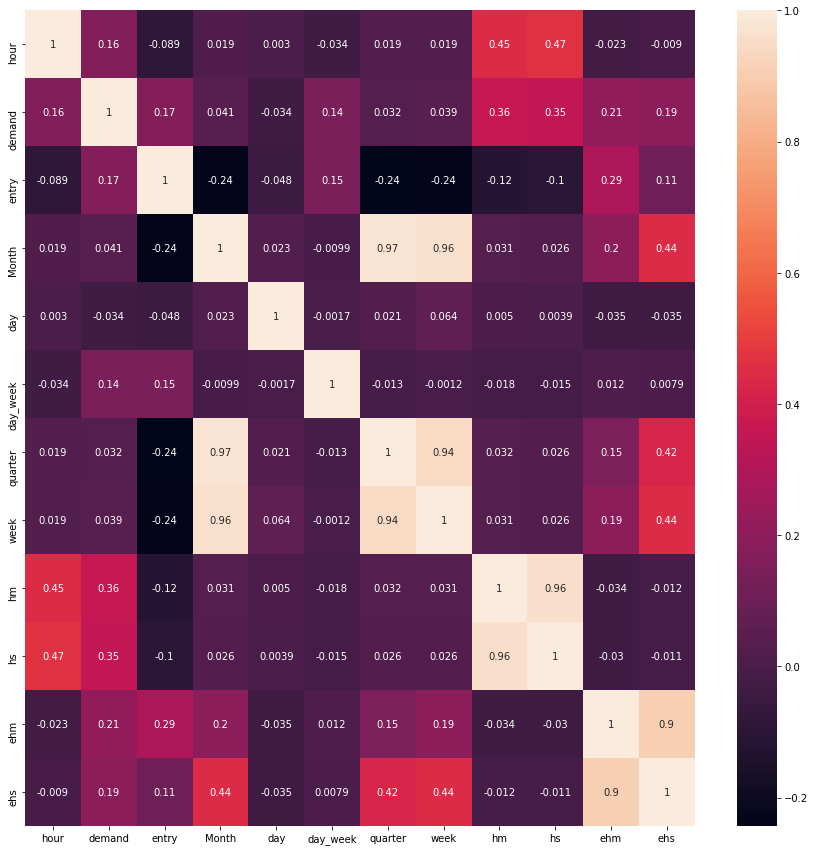

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

In [24]:
train.columns,test.columns

(Index(['date', 'hour', 'demand', 'entry', 'Month', 'day', 'day_week',
        'quarter', 'week', 'hm', 'hs', 'ehm', 'ehs'],
       dtype='object'),
 Index(['date', 'hour', 'entry', 'Month', 'day', 'day_week', 'quarter', 'week',
        'hm', 'hs', 'ehm', 'ehs'],
       dtype='object'))

In [25]:
X=train.drop(['demand','date'],axis=1)

In [26]:
y=train['demand']

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hour      18247 non-null  int64  
 1   entry     18247 non-null  int64  
 2   Month     18247 non-null  int64  
 3   day       18247 non-null  int64  
 4   day_week  18247 non-null  int64  
 5   quarter   18247 non-null  int64  
 6   week      18247 non-null  int64  
 7   hm        18247 non-null  float64
 8   hs        18247 non-null  float64
 9   ehm       18247 non-null  float64
 10  ehs       18247 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 1.5 MB


## Linear regression

In [28]:
test1=test.drop('date',axis=1)

## Decision tree

In [36]:
train.columns

feats=['hour' ,'entry', 'Month', 'day', 'day_week',
      #'quarter', 'week',
       'hm','hs','ehm','ehs'
      ]

In [37]:
import lightgbm as lgb
# lgb_model = lgb.LGBMRegressor(max_depth=2,num_leaves = 3,n_estimators = 20)
# lgb_model = lgb.LGBMRegressor(objective='quantile',alpha=0.5)
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(train[feats],y)

LGBMRegressor()

In [38]:
y_predlgbm=lgb_model.predict(test1[feats])

In [39]:
y_predl=lgb_model.predict(train[feats])

In [40]:
test['demand']=y_predlgbm

In [41]:
y_pred = lgb_model.predict(train[feats])

from sklearn.metrics import mean_squared_error
mean_squared_error(y_predl, y, squared=False)

30.37482562561356

## Output

In [42]:
new=test[['date','hour','demand']]

new.to_csv('lgbmf1.csv',index=False)